In [2]:
# IMPORT DATA :

import pandas as pd
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import train_test_split


df =pd.read_csv("C:/Users/Michel/Documents/Github/IntroML/HousingData/HousingData_post_treatment.csv")

df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333


[137 113 196 193 203 165 126 156  64  87  52  87 114 102  80  97 128  73
 100  80  40  94  54  48  57  42  65  50  82 108  32  48  36  35  39  87
  98 108 144 176 197 153 149 144 110  91  98  65  47  92  95 103 146 131
  87 200 144 181 130  94  85  59 119 146 189 132  92 117  72 107 139 114
 125 131 138 111  98 106 110 101 159 136 145 126 136 153 122 119 133 165
 123 117 126 146 104 162 111 211 219 191 157 152  84  91  99  93  93 102
  96  92 114 125  86  85  83  81 110  90 102  91 117 101 103  71  86 111
  58  61  78  46  90  94 127  82  57  79  72  69  37  76  43  47  38  57
  25  41  57  49  76  56 112  94  55  92  68  57  35 213 140 130 155 228
 228 228 124 146 228 135 135 120  72  89 128 133 123 168 129 143 171 207
 212 203 210 186 151 169 228 183 170 197 206 174 204 178 167 228 192 173
 195 197 188 138 215 226 228 123 141 122 141  98 114  91 121 160 134 146
 130 165 112 127 154 114 157 172 221 228 209 181 224 180 140 182 214 225
 166 137 147 180 134 130 117  99 119 134  74  83 14

Text(0, 0.5, 'y')

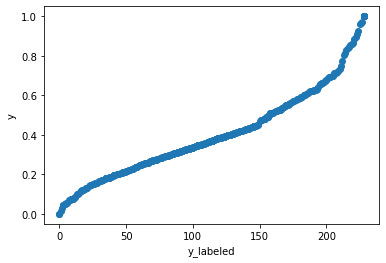

In [5]:
from sklearn import preprocessing
from sklearn import utils

from matplotlib import pyplot as plt


x = df.drop('MEDV', axis=1)
y = df['MEDV']

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

 
X_train,X_test,y_train,y_test = train_test_split(x,y_transformed,test_size=0.3, random_state=42)

plt.scatter(y_transformed,y)
plt.xlabel("y_labeled")
plt.ylabel("y")

In [3]:
clf = svm.SVC(kernel="poly",gamma=0.25,degree=2, C=1.0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([125, 199,   7, 114,  93, 138,  96,  76,  89,  73, 127, 156,  62,
       138,  96, 129, 103,   4, 192,  66, 109, 151,  65, 104,  66,  49,
       114,  38, 121,  73, 123, 128,  42,  97,  37,  55, 113, 119, 121,
       114,  73, 193, 215, 117, 117,  23,  82, 114,  89, 113,  52, 172,
        94, 157, 228, 104,  33, 208, 119,  99, 130, 197, 224, 128,  84,
       121,  32, 159, 197,  39,  91, 127,  51,  73, 138,   1,  92, 215,
        16,   7, 117,   8, 116,  18, 101, 147,  75, 128, 136,  72, 123,
         8,  90,  73, 116,  90,  42,  62,  38,   4, 119, 138,  49, 102,
        69,  24,  94, 127, 119, 197,  25,  16, 119, 207, 209,  38, 207,
        50, 142, 134, 103, 150,   6,  83, 144, 128, 142, 186,  38, 198,
       103,  69,  82,  86,  49,  44,  88, 197, 197,  65,  40, 166, 132,
       121,   8, 138,  38,  18,  40, 221,  38,  51], dtype=int64)

[0.43555556 0.62666667 0.06888889 0.37111111 0.26       0.42444444
 0.32888889 0.28444444 0.31333333 0.27777778 0.4        0.22222222
 0.07333333 0.42444444 0.32888889 0.40444444 0.34444444 0.04888889
 0.62888889 0.26       0.35777778 0.47555556 0.25777778 0.34666667
 0.26       0.21333333 0.37111111 0.20222222 0.38666667 0.27777778
 0.39111111 0.40222222 0.19777778 0.33111111 0.18444444 0.22888889
 0.36888889 0.38222222 0.38666667 0.37111111 0.27777778 0.63111111
 0.82888889 0.37777778 0.37777778 0.14444444 0.29777778 0.37111111
 0.31333333 0.36888889 0.22222222 0.55777778 0.32444444 0.5
 1.         0.34666667 0.17333333 0.71777778 0.38222222 0.33555556
 0.40666667 0.66444444 0.92666667 0.40222222 0.30222222 0.38666667
 0.17111111 0.51111111 0.66444444 0.18888889 0.31777778 0.4
 0.22       0.27777778 0.42444444 0.01333333 0.32       0.82888889
 0.11555556 0.22666667 0.37777778 0.07333333 0.37555556 0.12222222
 0.41777778 0.44666667 0.28222222 0.4        0.39777778 0.27555556
 0.391111

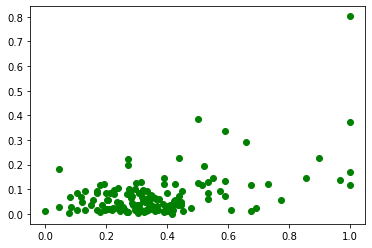

In [ ]:
 
import seaborn as sns 

y_pred = lab.inverse_transform(y_pred)
y_test = lab.inverse_transform(y_test)
print(y_pred)
plt.scatter(y_test, abs(y_pred - y_test) ,color='g') 



plt.show()

In [ ]:
# RMSE :



mean_squared_error(y_test, y_pred)

0.013434243014944771